# 전국 실업률 분포 변화
- 다음 데이터는 2000년부터 2022년까지 지역에 따른 실업률 데이터이다: 
> https://blog.hossam.kr/D01/unemployment_age.xlsx
- 이 데이터를 토대로 지역별 실업률이 어떻게 변화하고 있는지 확인하라

## 1. 데이터 분석 준비
### 패키지 및 데이터 가져오기

In [21]:
from matplotlib import pyplot as plt
from pandas import read_excel, melt, DataFrame
import seaborn as sb
import sys

In [10]:
df = read_excel("https://data.hossam.kr/D01/unemployment_age.xlsx",
                index_col=[0, 1])
df.head()

2000  2001  2002  2003  2004  2005  2006  2007  2008  2009  ...  \
시도별   연령계층별                                                               ...   
서울특별시 15-29세   8.1   8.4   8.2   8.8   8.9   8.9   8.8   7.4   7.6   8.1  ...   
      30-59세   3.9   3.6   3.0   3.2   3.4   3.6   3.4   3.2   3.0   3.7  ...   
      60세이상    2.9   1.9   2.3   1.9   2.1   2.1   2.6   1.7   1.8   2.3  ...   
부산광역시 15-29세  12.1  10.7   7.6   9.0   9.9   8.8   8.2   8.3   8.1   9.0  ...   
      30-59세   5.5   4.2   2.9   2.9   3.1   3.3   3.2   3.0   2.9   3.5  ...   

              2013  2014  2015  2016  2017  2018  2019  2020  2021  2022  
시도별   연령계층별                                                               
서울특별시 15-29세   8.7  10.4   9.3  10.3  10.1  10.1   8.8   9.1   9.0   6.8  
      30-59세   3.0   3.2   3.1   2.9   3.3   3.5   3.2   3.3   3.6   2.4  
      60세이상    2.5   2.8   3.2   2.8   3.6   4.0   4.3   4.7   5.1   3.6  
부산광역시 15-29세   8.8   9.0   9.7   9.9  11.5   9.5   9.1  10.6   7.7   6.8  
      30-59세   3.0   3.0   3.1   2.8   3.2   3.2   2.4   2.9   2.4   2.2  

[5 rows x 23 columns]

## 2. 데이터 전처리
### 1) 인덱스 해제 밑 데이터프레임 재구성
- `데이터프레임.reset_index()`
- `melt(데이터프레임, id_vars=[], var_name='', value_name='')`

In [12]:
df2 = df.reset_index()
print(df2.head())

df3 = melt(df2, 
           id_vars=['시도별', '연령계층별'], 
           var_name='년도', 
           value_name='실업률')
print(df3)

     시도별   연령계층별  2000  2001  2002  2003  2004  2005  2006  2007  ...  2013  \
0  서울특별시  15-29세   8.1   8.4   8.2   8.8   8.9   8.9   8.8   7.4  ...   8.7   
1  서울특별시  30-59세   3.9   3.6   3.0   3.2   3.4   3.6   3.4   3.2  ...   3.0   
2  서울특별시   60세이상   2.9   1.9   2.3   1.9   2.1   2.1   2.6   1.7  ...   2.5   
3  부산광역시  15-29세  12.1  10.7   7.6   9.0   9.9   8.8   8.2   8.3  ...   8.8   
4  부산광역시  30-59세   5.5   4.2   2.9   2.9   3.1   3.3   3.2   3.0  ...   3.0   

   2014  2015  2016  2017  2018  2019  2020  2021  2022  
0  10.4   9.3  10.3  10.1  10.1   8.8   9.1   9.0   6.8  
1   3.2   3.1   2.9   3.3   3.5   3.2   3.3   3.6   2.4  
2   2.8   3.2   2.8   3.6   4.0   4.3   4.7   5.1   3.6  
3   9.0   9.7   9.9  11.5   9.5   9.1  10.6   7.7   6.8  
4   3.0   3.1   2.8   3.2   3.2   2.4   2.9   2.4   2.2  

[5 rows x 25 columns]
        시도별   연령계층별    년도   실업률
0     서울특별시  15-29세  2000   8.1
1     서울특별시  30-59세  2000   3.9
2     서울특별시   60세이상  2000   2.9
3     부산광역시  15-29세  2000 

## 3. 시각화

In [13]:
plt.rcParams["font.family"] = 'AppleGothic' if sys.platform == 'darwin' else 'Malgun Gothic'
plt.rcParams["font.size"] = 14
plt.rcParams["figure.figsize"] = (24, 8)
plt.rcParams["axes.unicode_minus"] = False

### 1) 연도에 따른 전국 평균 실업률 변화 (전체연령)

     년도       실업률
0  2000  4.103922
1  2001  3.762745
2  2002  3.154902
3  2003  3.437255
4  2004  3.582353


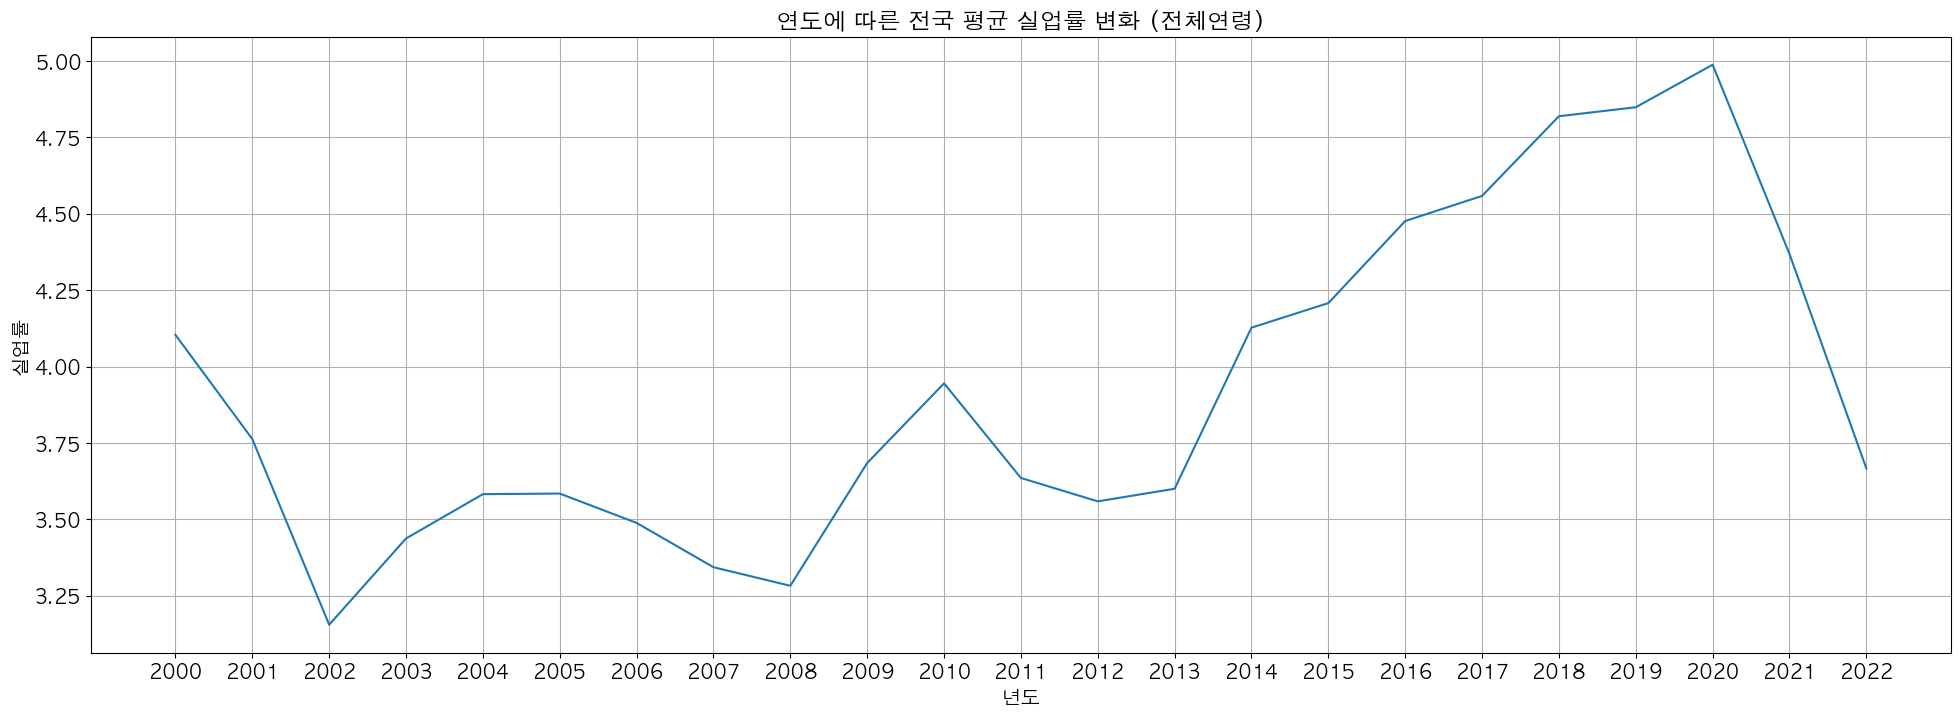

In [35]:
tdf = df3.filter(['년도', '실업률']).groupby(['년도'], 
                                        as_index=False).mean()
print(tdf.head())

plt.figure()
sb.lineplot(data=tdf, x='년도', y='실업률')
plt.title('연도에 따른 전국 평균 실업률 변화 (전체연령)')
plt.grid()
plt.show()
plt.close()

### 2) 연도에 따른 전국 평균 실업률 변화 (연령대별)

      년도   연령계층별       실업률
0   2000  15-29세  7.735294
1   2000  30-59세  3.052941
2   2000   60세이상  1.523529
3   2001  15-29세  7.435294
4   2001  30-59세  2.605882
..   ...     ...       ...
64  2021  30-59세  2.364706
65  2021   60세이상  3.570588
66  2022  15-29세  6.205882
67  2022  30-59세  1.982353
68  2022   60세이상  2.811765

[69 rows x 3 columns]


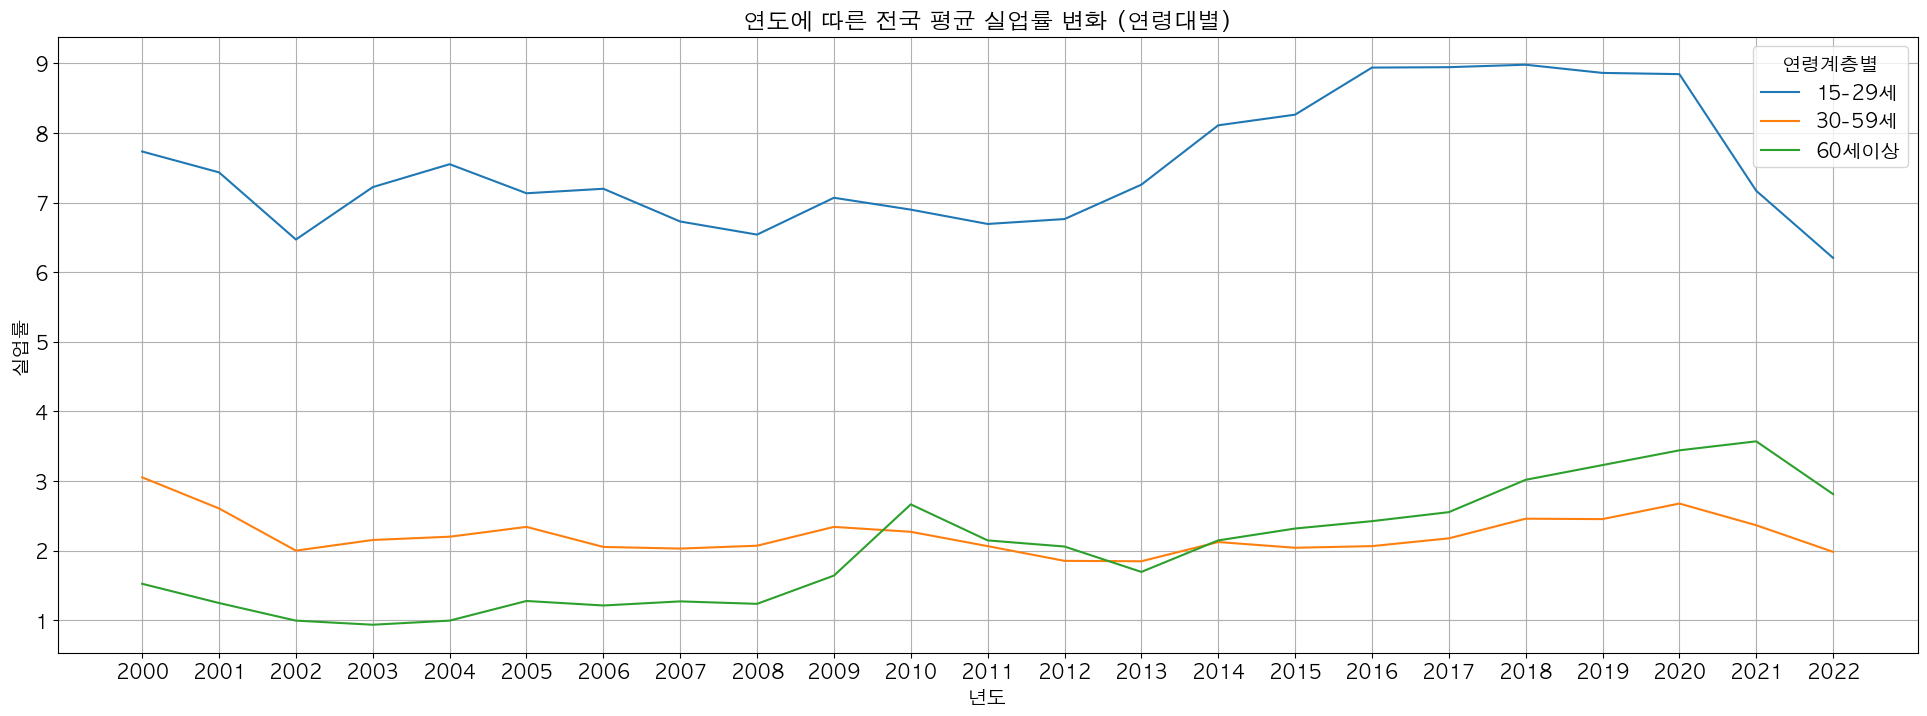

In [37]:
tdf_byage = df3.filter(['년도', 
                        '연령계층별', 
                        '실업률']).groupby(['년도', 
                                         '연령계층별'], 
                                         as_index=False).mean()
print(tdf_byage)

plt.figure()
sb.lineplot(data=tdf_byage, x='년도', y='실업률', hue='연령계층별')
plt.title('연도에 따른 전국 평균 실업률 변화 (연령대별)')
plt.grid()
plt.show()
plt.close()

### 3) 지역별 서브플롯
#### 1열 서브플롯

['서울특별시' '부산광역시' '대구광역시' '인천광역시' '광주광역시' '대전광역시' '울산광역시' '세종특별자치시' '경기도'
 '강원도' '충청북도' '충청남도' '전라북도' '전라남도' '경상북도' '경상남도' '제주도']


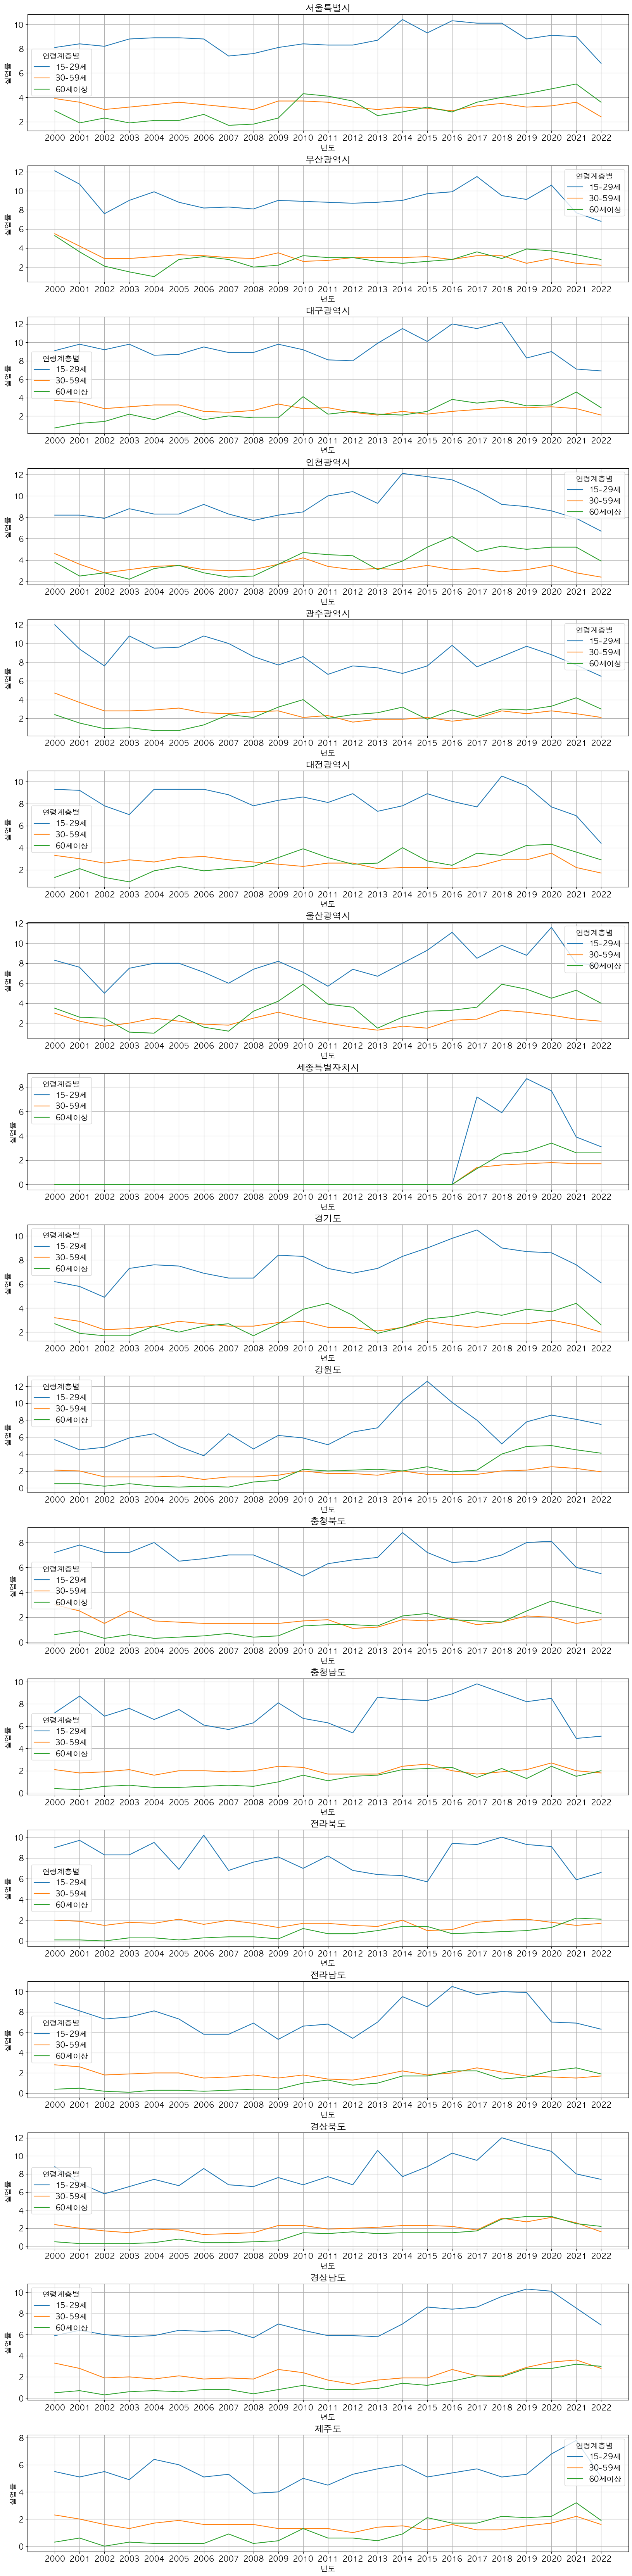

In [45]:
area = df3['시도별'].unique()
print(area)

fig, ax = plt.subplots(len(area), 1, figsize=(20, 5 * len(area)))
fig.subplots_adjust(hspace=0.3)

for i, v in enumerate(area):
    tdf = df3.query("시도별 == @v")
    sb.lineplot(data=tdf, x='년도', y='실업률', hue='연령계층별', ax=ax[i])
    ax[i].grid()
    ax[i].title.set_text(v)

plt.show()
plt.close()

#### 2열 서브플롯

In [46]:
size = len(area)
rows = int((size / 2) + 0.5)
rows

9

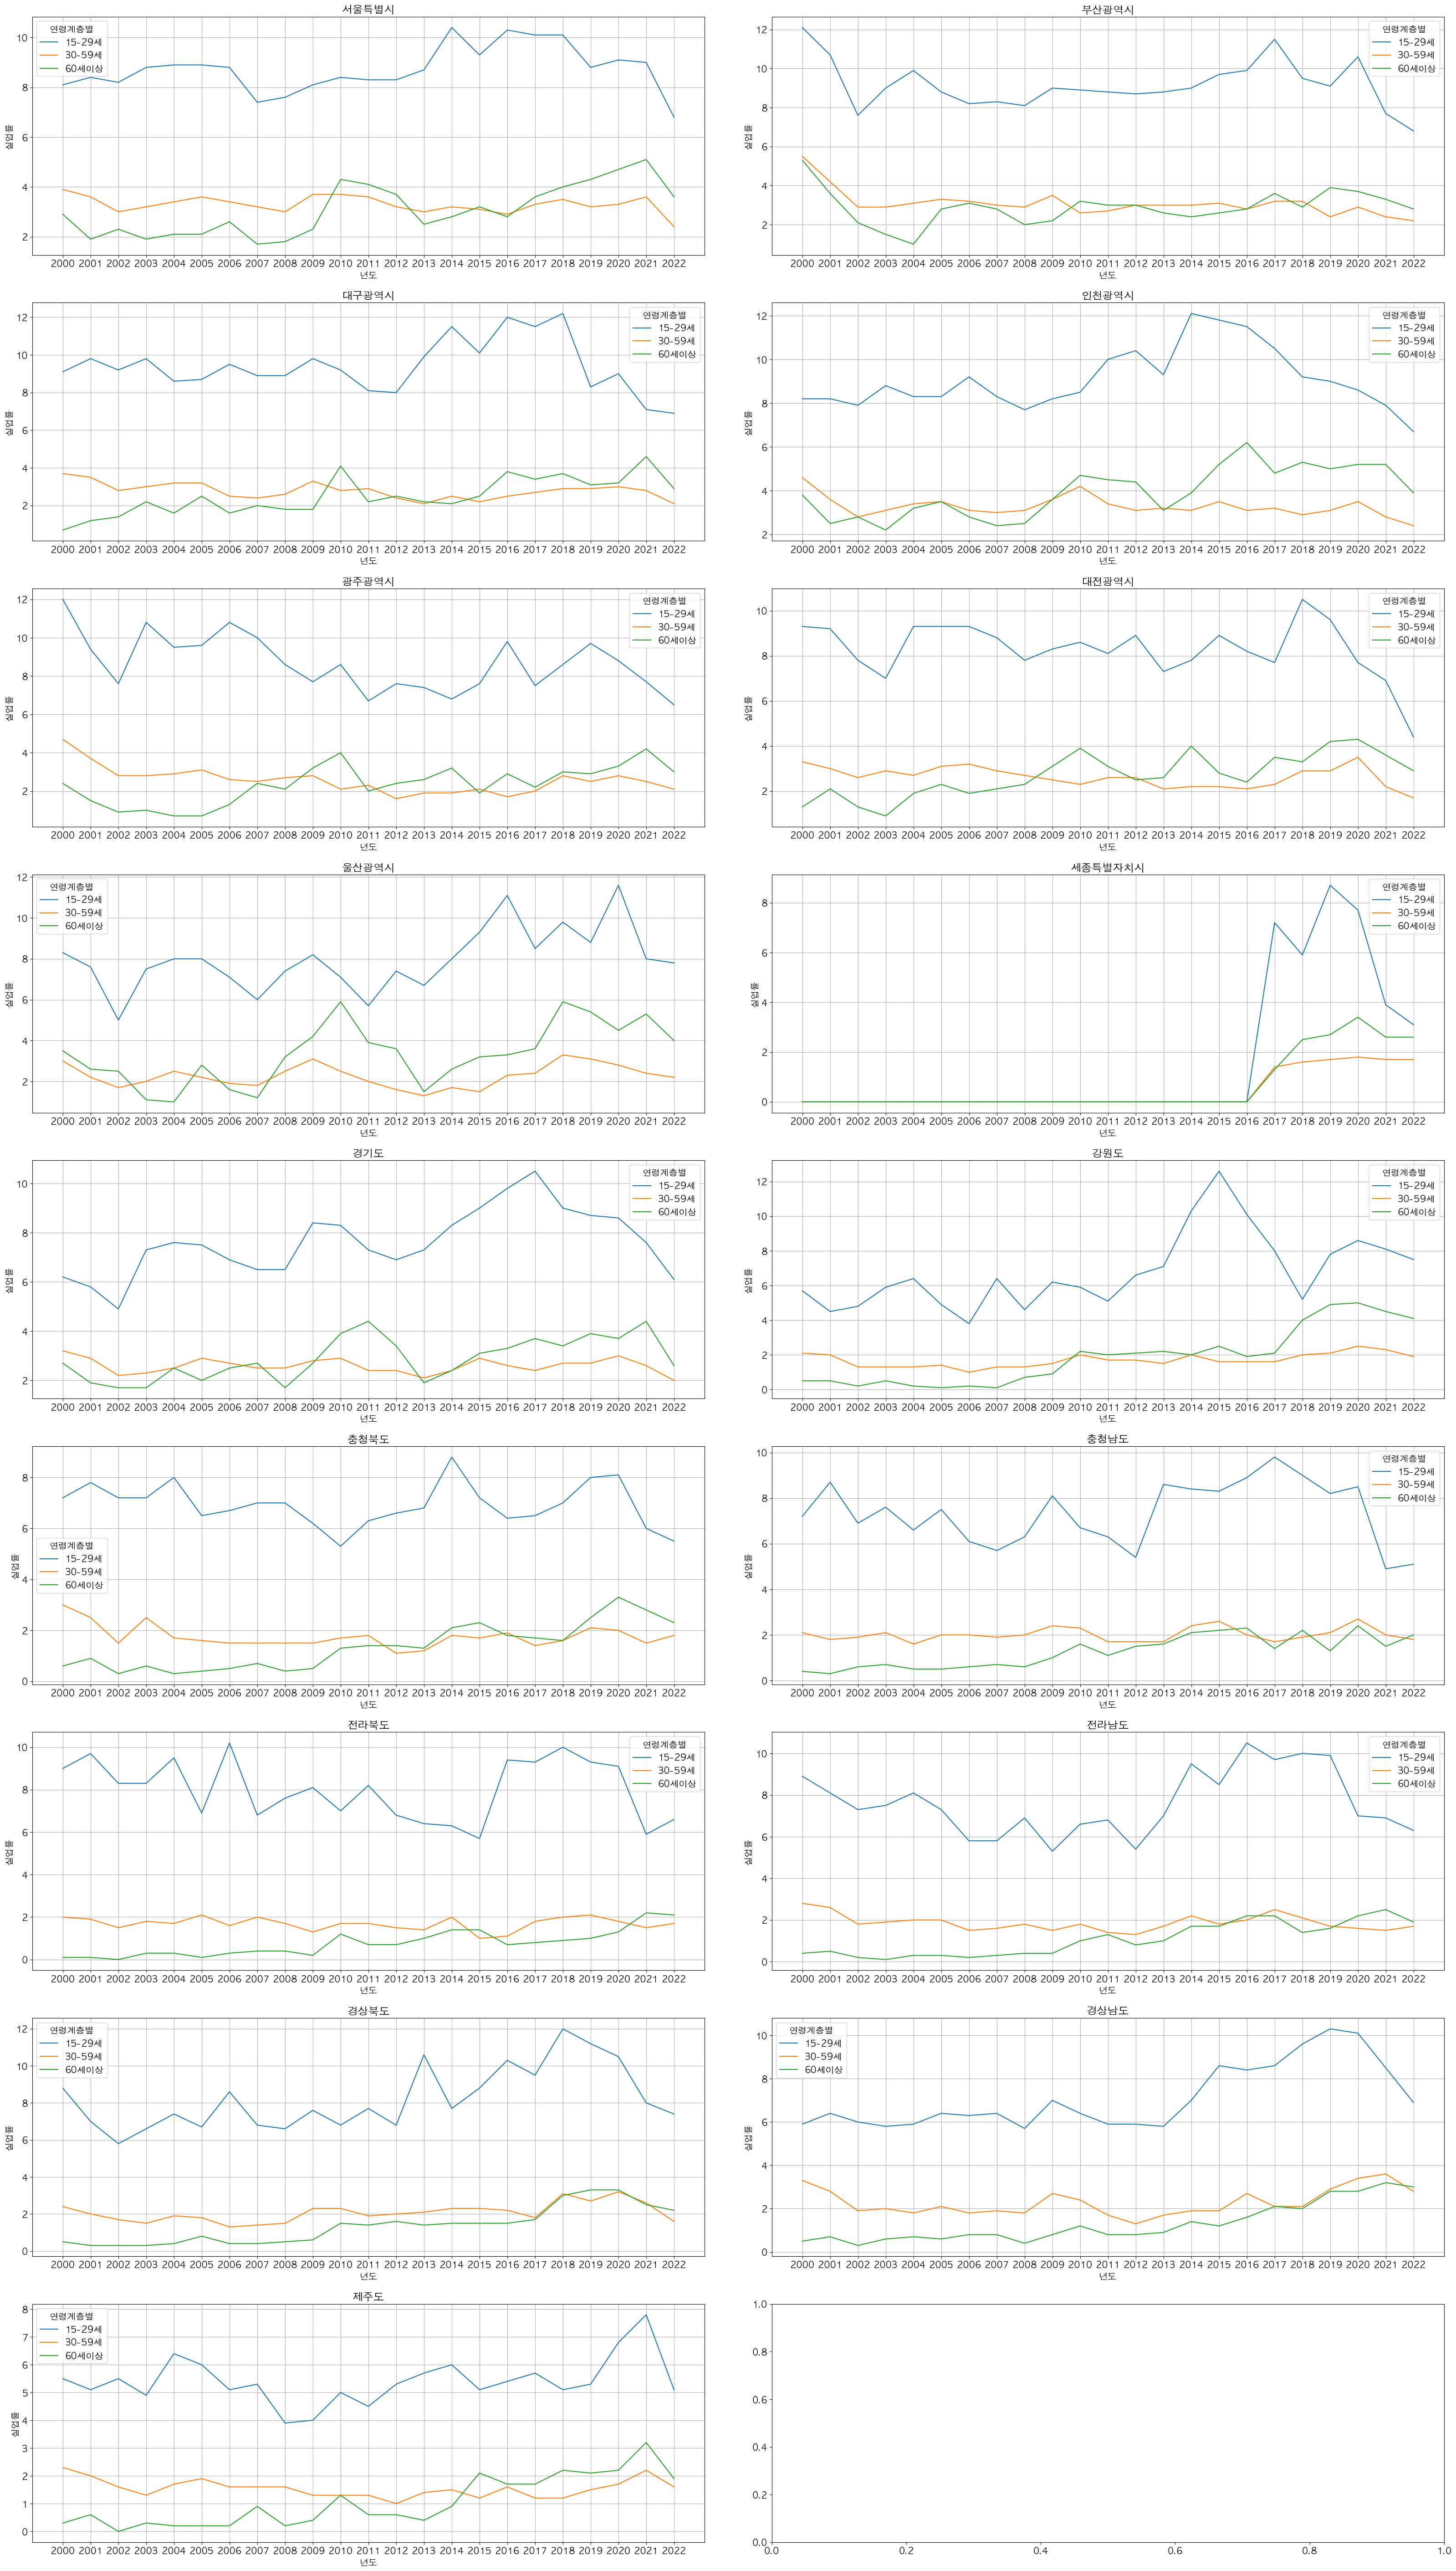

In [49]:
fig, ax = plt.subplots(rows, 2, figsize=(40, 8 * rows))
fig.subplots_adjust(wspace=0.1, hspace=0.2)

x = 0
for i in range(0, rows):
    for j in range(0, 2):
        if x >= size:
            break
        key = area[x]
        #print(key)
        x += 1
        tdf = df3.query("시도별 == @key")
        sb.lineplot(data=tdf, 
                    x='년도', 
                    y='실업률', 
                    hue='연령계층별', 
                    ax=ax[i][j])
        ax[i][j].grid()
        ax[i][j].title.set_text(key)
plt.show()
plt.close()